In [1]:
# python required >= 3.5 version
import sys
assert sys.version_info >=(3,5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

import numpy as np
import os

# make the output satable accros run
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

ROOT = "."
chapter_id = "DNN"
image_path = os.path.join(ROOT,"images",chapter_id)
os.makedirs(image_path,exist_ok=True)

def save_fig(fig_id,tigh_layout=True,fig_extension="png",resolution=300):
    path = os.path.join(image_path,fig_id + "." + fig_extension)
    print("save figure ",fig_id)
    if tigh_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)


# make the logistic sigmoid activation function

In [2]:
def logits(z):
    return 1 / (1 + np.exp(-z))

save figure  sigmoid_saturation


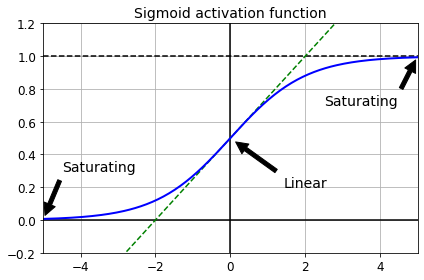

In [3]:
z = np.linspace(-5,5,200)

plt.plot([-5,5],[0,0],'k-')
plt.plot([-5,5],[1,1],"k--")
plt.plot([0,0],[-0.2,1.2],"k-")
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z,logits(z),"b-",linewidth=2)

props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")

plt.title("Sigmoid activation function", fontsize=14)
plt.grid(True)
plt.axis([-5,5, -0.2,1.2])
save_fig("sigmoid_saturation")
plt.show()


# Xavier and He Initialization

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
# glorot initializier => fan avg
keras.layers.Dense(10, activation="sigmoid",kernel_initializer="glorot_normal")

In [6]:
# variance scaling => merubah sebuah bentuk dari arsitektur
he_uniform_init = keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution="uniform")
value=keras.layers.Dense(10,activation="relu",kernel_initializer=he_uniform_init) 

membuat sebuah aliran signal menjadi baik pada forward dan backward dan tidak membuat aliran signal menjadi mati (die) => saturation dan explode. maka diperlukan weight initializers untuk membuat sebuah lower layers terdistribusi normal atau uniform(seragam) 

# Nonsaturating activation function

# Leaky relu

In [7]:
def leaky_relu(z,alpha=0.01):
    return np.maximum(alpha*z,z)

save figure  leaky_relu_plot


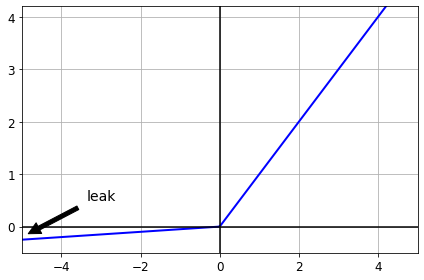

In [10]:
z = np.linspace(-5,5,200)
plt.plot(z,leaky_relu(z,0.05),"b-",linewidth=2)
plt.plot([-5,5],[0,0],"k-")
plt.plot([0,0],[-0.5,4.2],"k-")

props = dict(facecolor="black",shrink=0.1)
plt.annotate("leak",xytext=(-3,0.5),xy=(-5,-0.2),arrowprops=props,fontsize=14,ha="center")

plt.grid(True)
plt.axis([-5,5, -0.5,4.2])
save_fig("leaky_relu_plot")
plt.show()

In [11]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [13]:
# menegtahui activation variants pada relu 
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [14]:
# coba Leaky relu
(X_train_full,y_train_full),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()
# standarisasi train data
X_train_full = X_train_full/255.0

# split train data to train and validasi data
X_valid,X_train = X_train_full[:5000], X_train_full[5000:]
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

In [23]:
# satble configurasi output
tf.random.set_seed(42)
np.random.seed(42)

# create sequential mode
model_leak = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,kernel_initializer="he_normal"),#default => none(linear activation)
    keras.layers.LeakyReLU(alpha=0.001),
    
    keras.layers.Dense(100,kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.001),
    keras.layers.Dense(10,activation="softmax")
])

In [24]:
model_leak.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                   metrics=["accuracy"])

In [25]:
history = model_leak.fit(X_train,y_train,epochs=10,
                         validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3469 - accuracy: 0.6206 - val_loss: 0.9260 - val_accuracy: 0.7184
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8201 - accuracy: 0.7354 - val_loss: 0.7309 - val_accuracy: 0.7624
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6968 - accuracy: 0.7694 - val_loss: 0.6567 - val_accuracy: 0.7876
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6333 - accuracy: 0.7909 - val_loss: 0.6005 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5918 - accuracy: 0.8054 - val_loss: 0.5657 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5619 - accuracy: 0.8135 - val_loss: 0.5408 - val_accuracy: 0.8234
Epoch 7/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5391 - accuracy: 0.8203 - val_loss: 0.5198 - val_accuracy:

In [26]:
model_leak.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 67.6361 - accuracy: 0.8040


[67.6360855102539, 0.8040000200271606]

In [34]:
X_new=X_test[0:3]
y_test[0:3]

array([9, 2, 1], dtype=uint8)

In [38]:
np.argmax(model_leak.predict(X_new),axis=1)

1/1 [==============================] - 0s 15ms/step


array([9, 2, 1], dtype=int64)

# ELU

In [39]:
def elu(z,alpha=1):
    return np.where(z<0, alpha * (np.exp(z)-1),z)

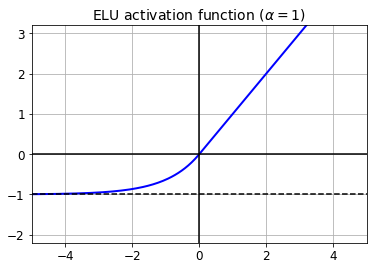

In [46]:
z = np.linspace(-5,5,200)
plt.plot(z,elu(z),"b-",linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')

plt.grid(True)
plt.axis([-5,5, -2.2,3.2])
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
save_fig("elu_plot")
plt.show()

In [49]:
# used the elu activation function
keras.layers.Dense(10,activation="elu")